## Bank Term Deposit Prediction

#### Business Objective:

The goal is to develop a predictive model to classify whether a client will subscribe to a term deposit based on demographic, socio-economic, and campaign-related factors.

The data file contains 41118 customers information and 21 columns 


##### Column Description:

- age	: Integer	Age
- job : Occupation
- marital : Marital Status
- education : Education Level 
- default : has credit in default?
- balance : average yearly balance in euros
- housing :	has housing loan?
- loan : has personal loan?	
- contact : contact communication type
- day_of_week : last contact day of the week
- duration : last contact duration, in seconds (numeric)
- campaign : number of contacts performed during this campaign and for this client
- pdays : number of days that passed by after the client was last contacted from a previous campaign(numeric, -1 means client was not previously contacted)
- previous : number of contacts performed before this campaign and for this client 
- poutcome : outcome of the previous marketing campaign
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)
- y : has the client subscribed a term deposit? (outcome)

##### Problem Statement: 
Using the provided data, develop a classification model that predicts whether a client will subscribe to a term deposit (yes/no) based on personal characteristics, contact details, and economic indicators. This model can help the bank improve its marketing strategy by identifying the characteristics of clients who are likely to respond positively to marketing campaigns, thereby enhancing campaign effectiveness and customer acquisition.

Acceptance Criterion: 
Need to deploy the end results using Flask /Streamlit.etc.


#### Dataset
##### Input variables:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

##### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### Social and economic context attributes:
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [227]:
import sys

In [229]:
#!{sys.executable} -m pip install pydotplus

In [232]:
#pip install graphviz

### Data Loading

In [240]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [238]:
#Loading data
df = pd.read_csv("banking.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [35]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [37]:
df.shape

(41188, 21)

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [18]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

### Data Pre-processing

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [42]:
#Statistical Analysis
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [40]:
#Checking Missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

There are no missing values in this dataset

In [41]:
#Checking for duplicates
df.duplicated().sum()

12

In [47]:
#Investigating these 12 duplicates
bank[bank.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [47]:
df.groupby(["y"]).count()[["age"]].rename({"age" : "Count"}, axis = 1)

,Count
y,
0,36548
1,4640


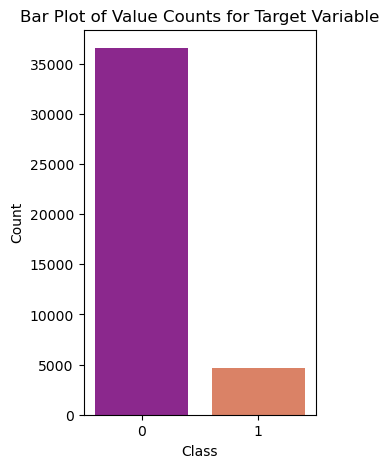

In [51]:
plt.figure(figsize=(3, 5))
sns.barplot(x=df['y'].value_counts().index, y=df['y'].value_counts().values, palette='plasma')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts for Target Variable')
plt.show()

In [52]:
df["target"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)
df.drop(columns=["y"], inplace = True)

In [53]:
df[["target"]]

,target
0,0
1,0
2,0
3,0
4,0
...,...
41183,0
41184,0
41185,0
41186,0


# Building Decision Tree Classifier¶

In [241]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [242]:
df = pd.read_csv("banking.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [119]:
# Display the first few rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [145]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [146]:
#Complete dataset
label_encoder = LabelEncoder()
df['y']= label_encoder.fit_transform(df['y'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,3,1,0,2,1,4,2,...,1,999,0,1,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,3,1,0,1,0,0,1,6,2,...,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,0,2,6,1,2,2,1,6,4,...,3,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,9,1,5,0,0,2,1,8,3,...,2,999,0,1,-3.4,92.431,-26.9,0.742,5017.5,0


In [149]:
x = df.iloc[:, 0:19]
y = df['y']

In [150]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m
0,44,1,1,0,1,2,0,0,1,2,210,1,999,0,1,1.4,93.444,-36.1,4.963
1,53,9,1,7,0,0,0,0,7,0,138,1,999,0,1,-0.1,93.200,-42.0,4.021
2,28,4,2,6,0,2,0,0,4,2,339,3,6,2,2,-1.7,94.055,-39.8,0.729
3,39,7,1,3,0,0,0,0,0,0,185,2,999,0,1,-1.8,93.075,-47.1,1.405
4,55,5,1,0,0,2,0,0,1,0,137,1,3,1,2,-2.9,92.201,-31.4,0.869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,3,1,0,2,1,4,2,222,1,999,0,1,1.4,94.465,-41.8,4.866
41184,31,3,1,0,1,0,0,1,6,2,196,2,999,0,1,1.1,93.994,-36.4,4.860
41185,42,0,2,6,1,2,2,1,6,4,62,3,999,0,1,1.1,93.994,-36.4,4.857
41186,48,9,1,5,0,0,2,1,8,3,200,2,999,0,1,-3.4,92.431,-26.9,0.742


In [151]:
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [152]:
df['y'].unique()

array([0, 1], dtype=int64)

In [153]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [154]:
colnames = list(df.columns)
colnames

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

In [ ]:
import seaborn as sns
sns.pairplot(df, hue = 'y')

In [243]:
# Splitting data into training and testing data set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [244]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m
12556,39,1,1,1,1,2,0,1,4,2,414,1,999,0,1,1.4,94.465,-41.8,4.866
35451,39,7,1,3,0,0,0,1,6,2,359,3,999,0,1,1.1,93.994,-36.4,4.860
30592,40,0,1,5,1,0,0,0,0,1,98,3,999,0,1,-1.8,93.075,-47.1,1.405
17914,40,2,0,6,0,0,0,1,4,1,146,3,999,0,1,1.4,94.465,-41.8,4.947
3315,98,5,1,0,1,2,0,0,8,0,272,2,999,0,1,-3.4,92.431,-26.9,0.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,42,4,1,3,0,2,0,0,1,3,671,1,999,0,1,1.4,93.444,-36.1,4.963
11284,34,0,2,6,0,0,0,0,1,4,195,1,999,0,1,-2.9,92.201,-31.4,0.854
38158,30,7,2,3,0,2,0,0,8,1,385,2,999,0,1,-3.4,92.431,-26.9,0.739
860,27,9,2,5,0,0,0,0,3,1,93,7,999,0,1,1.4,93.918,-42.7,4.960


In [158]:
y_train

12556    0
35451    0
30592    0
17914    0
3315     1
        ..
6265     0
11284    1
38158    1
860      0
15795    0
Name: y, Length: 32950, dtype: int64

In [163]:
df[df['y'] == 0]['euribor3m']

0        4.963
1        4.021
3        1.405
5        4.961
6        1.327
         ...  
41183    4.866
41184    4.860
41185    4.857
41186    0.742
41187    4.859
Name: euribor3m, Length: 36548, dtype: float64

In [164]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
#criterion = 'gini'
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

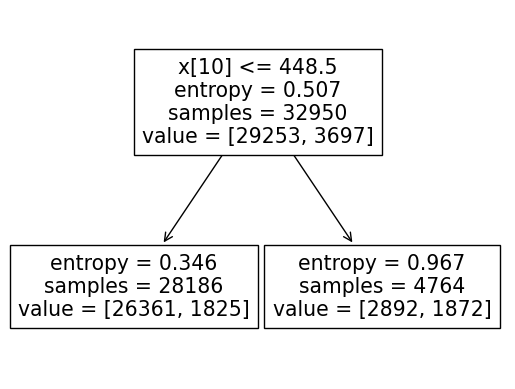

In [245]:
#PLot the decision tree
plot_tree(model)
plt.show()

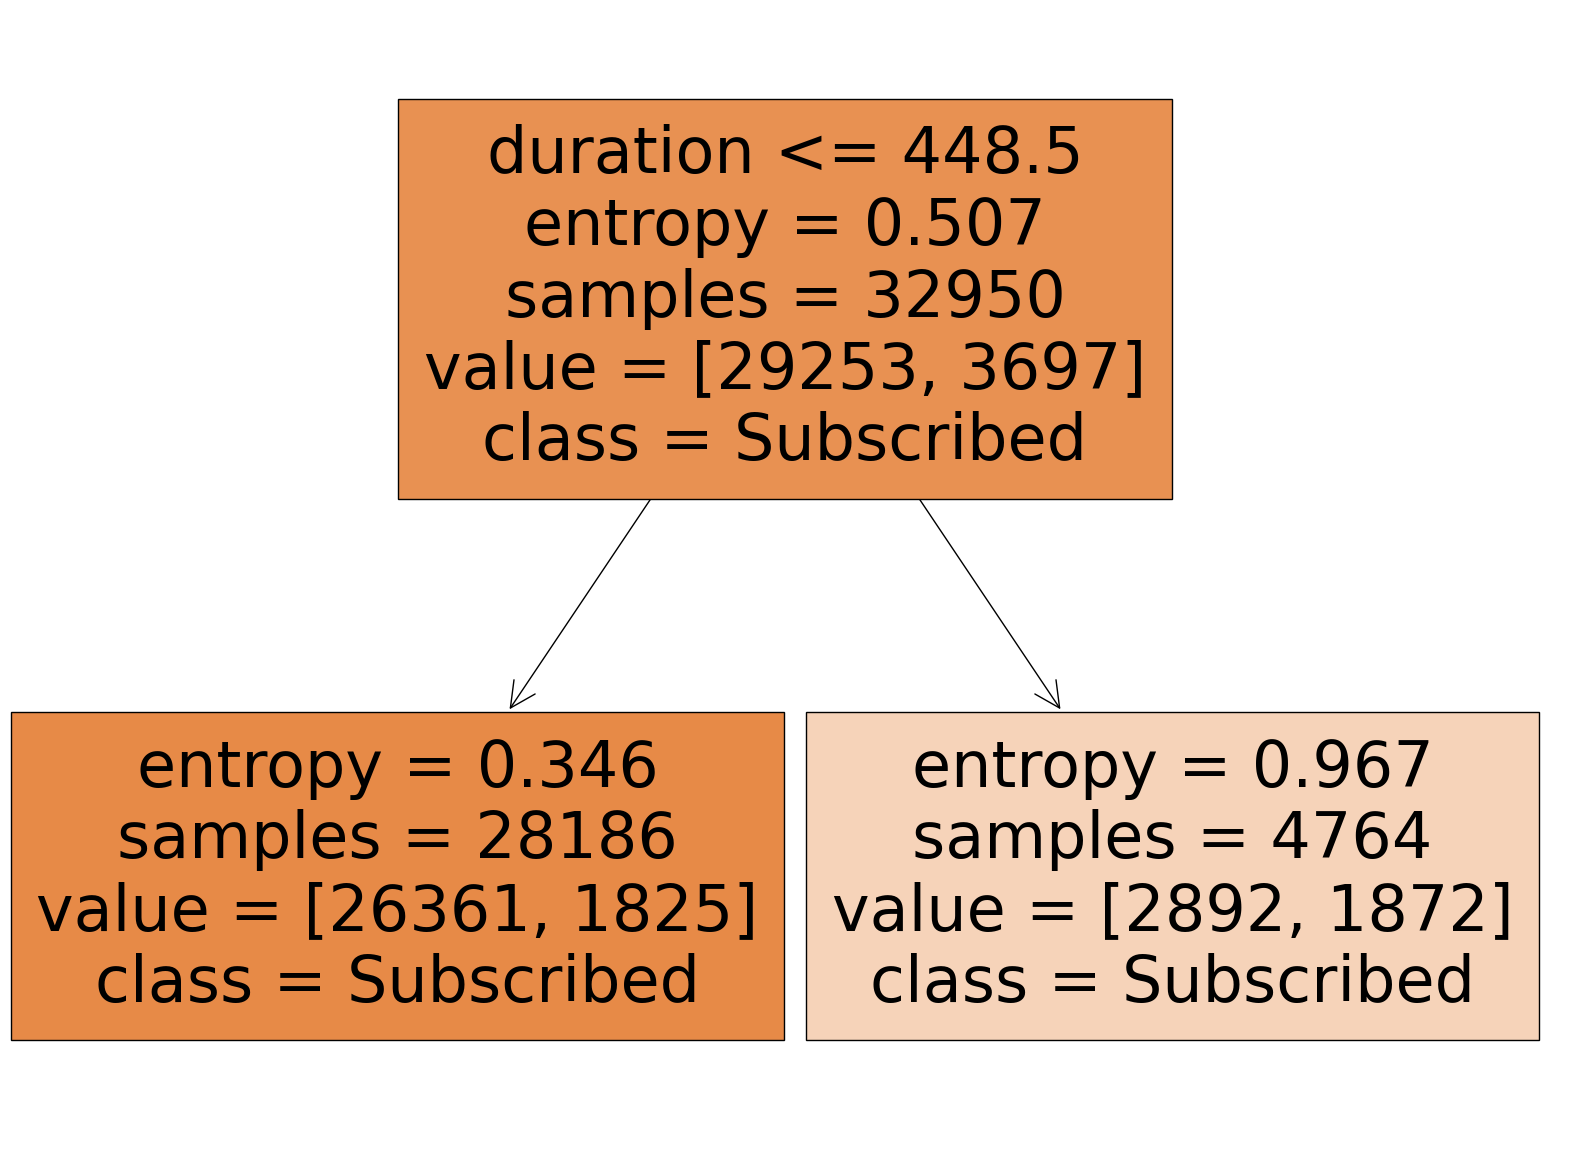

In [246]:
fn=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'] #feature names
cn=['Subscribed', 'Not Subscribed'] #class names

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plt.figure(figsize = (20,15))
plot_tree(model,
          feature_names = fn, 
          class_names = cn,
          filled = True)

plt.show()

In [247]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
pd.Series(preds).value_counts() # getting the count of each category 

0    8238
dtype: int64

In [190]:
y_test

32884    0
3169     1
32206    1
9403     0
14020    0
        ..
12322    0
23440    0
29431    1
16627    1
1871     1
Name: y, Length: 8238, dtype: int64

In [191]:
pd.DataFrame({'Actual' : y_test,
             'Predicted' : preds})

,Actual,Predicted
32884,0,0
3169,1,0
32206,1,0
9403,0,0
14020,0,0
...,...,...
12322,0,0
23440,0,0
29431,1,0
16627,1,0


In [192]:
pd.crosstab(y_test, preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0
y,
0,7295
1,943


In [193]:
preds == y_test

32884     True
3169     False
32206    False
9403      True
14020     True
         ...  
12322     True
23440     True
29431    False
16627    False
1871     False
Name: y, Length: 8238, dtype: bool

In [194]:
# Accuracy 
np.mean(preds == y_test)

0.8855304685603301

In [195]:
29/30

0.9666666666666667

In [196]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)

In [197]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [198]:
#Prediction and computing the accuracy
pred=model.predict(x_test)

In [199]:
np.mean(preds == y_test)

0.8855304685603301

In [200]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [248]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9177274461517116
Test Score: 0.9148660678158129


In [136]:
pred_y = clf.predict(test_X)

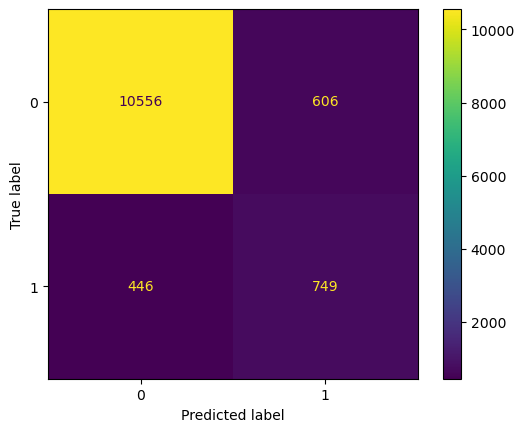

In [254]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [255]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11162
           1       0.55      0.63      0.59      1195

    accuracy                           0.91     12357
   macro avg       0.76      0.79      0.77     12357
weighted avg       0.92      0.91      0.92     12357



In [209]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 91.48660678158129


In [210]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  91.13862225767117


### Decision Tree Classifier
Decision trees works through the data to decide if one action occurs, what will then be the result of a "yes" and a "no". It works each data making the decision of which path to take based on the answer. Because of this decision making process, this algorithm has no assumptions about the structure of the data, but instead decides on the path to take through each decision the algorithm performs.

Training and evaluating Decision Tree model performance: